CHARGEMENT DATA ET ECHANTILLONAGE AUTO-KERAS DES "TRAIN / TEST"

In [5]:
from tensorflow.keras.datasets import imdb # type: ignore

# garder les 10000 mots les plus fréquents
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

print("Exemple de critique encodée :", x_train[0])
print("Label correspondant (1=positif, 0=négatif) :", y_train[0])

Exemple de critique encodée : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Label correspondant (1=positif

PRE TRAITEMENT DES DATAS

In [6]:
# Fixer une longueur maximale pour les séquences
# Normaliser les longueurs pour faciliter le développement du modèle

from tensorflow.keras.preprocessing.sequence import pad_sequences # type: ignore

maxlen = 100
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

print("Critique après padding :", x_train[0])
# print("Total critiques :", sum(x_train))


Critique après padding : [1415   33    6   22   12  215   28   77   52    5   14  407   16   82
    2    8    4  107  117 5952   15  256    4    2    7 3766    5  723
   36   71   43  530  476   26  400  317   46    7    4    2 1029   13
  104   88    4  381   15  297   98   32 2071   56   26  141    6  194
 7486   18    4  226   22   21  134  476   26  480    5  144   30 5535
   18   51   36   28  224   92   25  104    4  226   65   16   38 1334
   88   12   16  283    5   16 4472  113  103   32   15   16 5345   19
  178   32]


CREATION MODELE LEARNING

In [7]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Embedding, LSTM, Dense # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from tensorflow.keras.layers import Dropout# type: ignore

model = Sequential([
    Embedding(input_dim=num_words, output_dim=64, input_length=maxlen),
    LSTM(64, return_sequences=False),
    Dropout(0.5),  # Ajout d'un Dropout
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

c:\Users\Utilisateur\anaconda3\envs\ENV_3.10ml\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


ENTRAINER LE MODELE + ANALYSE DES METRICS

In [8]:

history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=7,
    batch_size=64
)

model.summary()

Epoch 1/7
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.6717 - loss: 0.5738 - val_accuracy: 0.8270 - val_loss: 0.3821
Epoch 2/7
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8802 - loss: 0.3049 - val_accuracy: 0.8476 - val_loss: 0.3709
Epoch 3/7
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.9225 - loss: 0.2151 - val_accuracy: 0.8376 - val_loss: 0.4114
Epoch 4/7
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9368 - loss: 0.1807 - val_accuracy: 0.8328 - val_loss: 0.4122
Epoch 5/7
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9551 - loss: 0.1411 - val_accuracy: 0.8330 - val_loss: 0.5314
Epoch 6/7
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9650 - loss: 0.1116 - val_accuracy: 0.8354 - val_loss: 0.4579
Epoch 7/7
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.9751 - loss: 0.0827 - val_accuracy: 0.8190 - val_loss: 0.4936


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,019,269 (7.70 MB)

 Trainable params: 673,089 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,346,180 (5.14 MB)

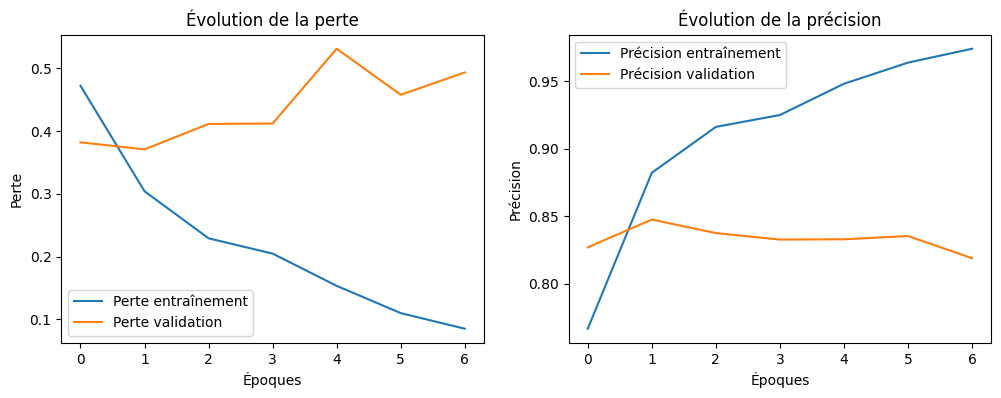

In [ ]:
import matplotlib.pyplot as plt # type: ignore

# Affichage des métriques
def plot_history(history):
    # Perte
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Perte entraînement')
    plt.plot(history.history['val_loss'], label='Perte validation')
    plt.title('Évolution de la perte')
    plt.xlabel('Époques')
    plt.ylabel('Perte')
    plt.legend()

    # Précision
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Précision entraînement')
    plt.plot(history.history['val_accuracy'], label='Précision validation')
    plt.title('Évolution de la précision')
    plt.xlabel('Époques')
    plt.ylabel('Précision')
    plt.legend()

    plt.show()

# second entrainement avec dropout + augmentation des epochs de 3 à 7
# plot_history(history)


In [ ]:
# third train if possible
# plot_history(history)

EVALUATION DU MODELE en plusieurs tests de précision selon différentes "config models"

In [12]:
# first test
loss, accuracy = model.evaluate(x_test, y_test)
print(f"\nPrécision sur les données de test : {accuracy * 100:.2f}%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8418 - loss: 0.3965

Précision sur les données de test : 84.14%


In [10]:
# second test
loss, accuracy = model.evaluate(x_test, y_test)
print(f"\nPrécision sur les données de test : {accuracy * 100:.2f}%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8212 - loss: 0.4913

Précision sur les données de test : 82.15%


TESTER AVEC UNE CRTITIQUE PERSO IMDB

In [19]:
import tensorflow as tf #type: ignore

# Fonction pour décoder les critiques
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(encoded_review):
    return " ".join([reverse_word_index.get(i - 3, "-") for i in encoded_review])

# ICI x-test[x1,...xn] pour tester que la prédiction du Modele est FIABLE.
example_review = x_test[60]
decoded_review = decode_review(example_review)
print("\nCritique décodée :", decoded_review)

# Prédiction sur la critique test
prediction = model.predict(tf.expand_dims(example_review, 0))
print(f"\nPrédiction : {'Positive' if prediction[0][0] > 0.5 else 'Négative'}")



Critique décodée : like coming home and seeing your wife having relations with a - seriously this movie was bad it's like club dread after super troopers i am supposed to write 10 lines but i don't even know what else to say i laughed a couple of times but only because i was drinking a movie like that should at least be funny when your drunk it was not maybe are just funny and regular cartoon people aren't either way just stick with the new groove if you want a funny cartoon - themed movie line 10 is this line right here
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

Prédiction : Négative


CONCLUSION

Le modèle utilisé est un modèle SEQUENTIAL avec des layers Embedding + LSTM + dropout + DENSE (sigmoid en sortie pour NEG ou POS)

Optimizer ADAM avec metriques d'analyse = précision

Entrainement sur 7 EPOCHS et un BATCH SIZE de 64
NB : je précise que 20% des datas d'entrainement seront reservées à la validation

RESULTS de la PREDICTION TEST : 

La prédiction est sur 10 essais = 100%, il faudrai poursuivre ou projeter une analyse expérimentation à mong terme pour une CERTITUDE.
BON RETEX!!!!!

